In [517]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz 
import plotly.express as px
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn import preprocessing
plt.rcParams["figure.figsize"] = (5,5)

def calc_rss(y,predicted):
    return float(((predicted - y) ** 2).sum())

In [518]:
#PADRONIZACAO
scaler = MinMaxScaler(feature_range=(0,1))
#PADRONIZACAO

arquivo ="./ToolDataSheetVsNQuebras.csv"

In [519]:
dfQP = pd.read_csv(arquivo, sep=";")
dfQP.head(5)

,PartNumber,nQuebras,Family,Supplier,LargerDiameter,StemDiameter,TotalLength,ChannelLength,MaterialClass,PropellerAngle,Refrigeration
0,4721700050,5,217-RH,3M TECHNICAL CERAMICS ZWEIGNIEDERLA,3.0,3.0,38.0,2.5,Desconhecido,0.0,0
1,4700101394,26,001-BA,ALLIANCE CNC,10.7,12.0,92.0,50.0,K30/40-UF,30.0,1
2,4700101395,28,001-BA,ALLIANCE CNC,9.7,10.0,92.0,50.0,K30/40-UF,30.0,1
3,4700500778,5,005-BG,ALLIANCE CNC,4.0,6.0,58.0,17.0,K30/40-UF,27.0,0
4,4700700155,9,007-BK,BLICKLE WERKZEUGE GMBH & CO KG,6.0,6.0,66.0,25.0,K30/40-UF,15.0,1


In [520]:
print(len(dfQP))
dfQP.corr()

220


,PartNumber,nQuebras,LargerDiameter,StemDiameter,TotalLength,ChannelLength,PropellerAngle,Refrigeration
PartNumber,1.000000,-0.124252,-0.032590,-0.118903,-0.196125,-0.262226,-0.039032,-0.422470
nQuebras,-0.124252,1.000000,-0.027603,-0.034953,0.215946,0.233200,-0.035442,0.171622
LargerDiameter,-0.032590,-0.027603,1.000000,0.508314,0.121442,0.063380,-0.037932,0.085900
StemDiameter,-0.118903,-0.034953,0.508314,1.000000,0.345166,0.221651,-0.088115,0.218300
TotalLength,-0.196125,0.215946,0.121442,0.345166,1.000000,0.906418,-0.084554,0.555539
ChannelLength,-0.262226,0.233200,0.063380,0.221651,0.906418,1.000000,-0.069891,0.574342
PropellerAngle,-0.039032,-0.035442,-0.037932,-0.088115,-0.084554,-0.069891,1.000000,-0.080247
Refrigeration,-0.422470,0.171622,0.085900,0.218300,0.555539,0.574342,-0.080247,1.000000


## KNN Algoritmo

In [522]:
X = scaler.fit_transform(dfQP.loc[:,["ChannelLength"]])
y = scaler.fit_transform(dfQP.loc[:,["nQuebras"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2_test:  -5.139075892930037
RSS_teste:  1186.8299503352368
----
R2_train:  0.4927322343361018
RSS_train:  33.30757394966625


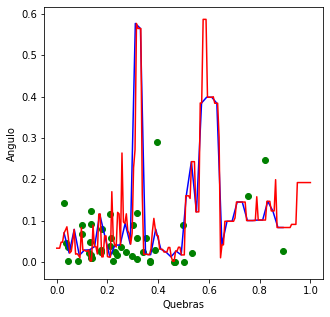

In [523]:
#KNRegressor  - UNIFORM
neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform')
neigh.fit(X_train,y_train)

T = np.linspace(min(X_test),max(X_test), len(X_test) )[:, np.newaxis]
O = np.linspace(min(X_train),max(X_train), len(X_train) )[:, np.newaxis]

xtrain_Len = len(X_train)
xtest_Len = len(X_test)

plt.scatter(X_test, y_test,color='g')
plt.plot(T.reshape(xtest_Len,1), neigh.predict(T.reshape(xtest_Len,1)),color='b')
plt.plot(O.reshape(xtrain_Len,1), neigh.predict(O.reshape(xtrain_Len,1)),color='r')
plt.xlabel('Quebras')
plt.ylabel('Angulo')

print("R2_test: ", neigh.score(X_test,y_test))
print("RSS_teste: ", calc_rss(y_test, neigh.score(X_test,y_test)))
print("----")
print("R2_train: ", neigh.score(X_train,y_train))
print("RSS_train: ", calc_rss(y_train, neigh.score(X_train,y_train)))

In [524]:
X = dfQP.loc[:,["ChannelLength"]]
y = dfQP.loc[:,["nQuebras"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2_test:  -0.5765603333458877
RSS_teste:  186614.45124936284
----
R2_train:  0.47354023291461445
RSS_train:  1892039.3826150813


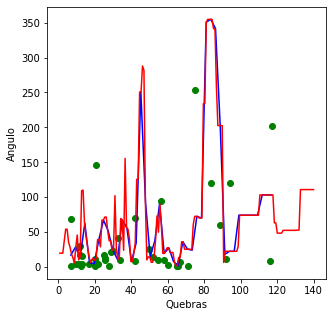

In [525]:
#KNRegressor  - UNIFORM
neigh = KNeighborsRegressor(n_neighbors=3,weights='uniform')
neigh.fit(X_train,y_train)

T = np.linspace(min(X_test.values.ravel()),max(X_test.values.ravel()), len(X_test) )[:, np.newaxis]
O = np.linspace(min(X_train.values.ravel()),max(X_train.values.ravel()), len(X_train) )[:, np.newaxis]

plt.scatter(X_test, y_test,color='g')
plt.plot(T, neigh.predict(T),color='b')
plt.plot(O, neigh.predict(O),color='r')
plt.xlabel('Quebras')
plt.ylabel('Angulo')

print("R2_test: ", neigh.score(X_test,y_test))
print("RSS_teste: ", calc_rss(y_test, neigh.score(X_test,y_test)))
print("----")
print("R2_train: ", neigh.score(X_train,y_train))
print("RSS_train: ", calc_rss(y_train, neigh.score(X_train,y_train)))

In [526]:
X = scaler.fit_transform(dfQP.loc[:,["ChannelLength"]])
y = scaler.fit_transform(dfQP.loc[:,["nQuebras"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2_test:  -0.44006714856090473
RSS_teste:  12.968019620515864
----
R2_train:  0.583983985561058
RSS_train:  48.649112066087525


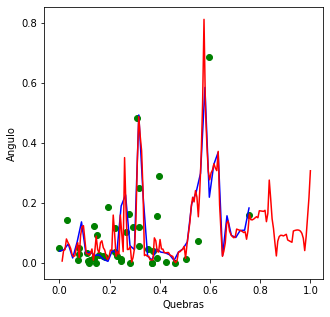

In [530]:
#KNRegressor  - UNIFORM
neigh = KNeighborsRegressor(n_neighbors=5,weights='distance')
neigh.fit(X_train,y_train)

T = np.linspace(min(X_test),max(X_test), len(X_test) )[:, np.newaxis]
O = np.linspace(min(X_train),max(X_train), len(X_train) )[:, np.newaxis]

xtrain_Len = len(X_train)
xtest_Len = len(X_test)

plt.scatter(X_test, y_test,color='g')
plt.plot(T.reshape(xtest_Len,1), neigh.predict(T.reshape(xtest_Len,1)),color='b')
plt.plot(O.reshape(xtrain_Len,1), neigh.predict(O.reshape(xtrain_Len,1)),color='r')
plt.xlabel('Quebras')
plt.ylabel('Angulo')

print("R2_test: ", neigh.score(X_test,y_test))
print("RSS_teste: ", calc_rss(y_test, neigh.score(X_test,y_test)))
print("----")
print("R2_train: ", neigh.score(X_train,y_train))
print("RSS_train: ", calc_rss(y_train, neigh.score(X_train,y_train)))

In [531]:
X = dfQP.loc[:,["ChannelLength"]]
y = dfQP.loc[:,["nQuebras"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2_test:  -0.07550789820358927
RSS_teste:  473367.1467893346
----
R2_train:  0.6060378126768735
RSS_train:  1602337.2033404515


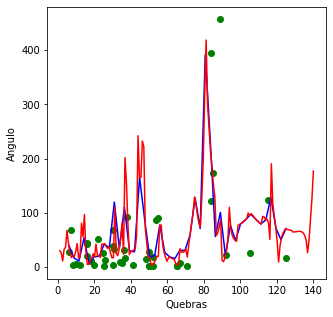

In [532]:
#KNRegressor  - UNIFORM
neigh = KNeighborsRegressor(n_neighbors=5,weights='distance')
neigh.fit(X_train,y_train)

T = np.linspace(min(X_test.values.ravel()),max(X_test.values.ravel()), len(X_test) )[:, np.newaxis]
O = np.linspace(min(X_train.values.ravel()),max(X_train.values.ravel()), len(X_train) )[:, np.newaxis]

plt.scatter(X_test, y_test,color='g')
plt.plot(T, neigh.predict(T),color='b')
plt.plot(O, neigh.predict(O),color='r')
plt.xlabel('Quebras')
plt.ylabel('Angulo')

print("R2_test: ", neigh.score(X_test,y_test))
print("RSS_teste: ", calc_rss(y_test, neigh.score(X_test,y_test)))
print("----")
print("R2_train: ", neigh.score(X_train,y_train))
print("RSS_train: ", calc_rss(y_train, neigh.score(X_train,y_train)))

## Arvore Decisao Algoritmo

In [533]:
X = scaler.fit_transform(dfQP.loc[:,["ChannelLength"]])
y = scaler.fit_transform(dfQP.loc[:,["nQuebras"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2T:  0.11958872351738671
RSST:  1.7332926062512248
----
R2O:  0.5074503361549647
RSSO:  35.42986793008562


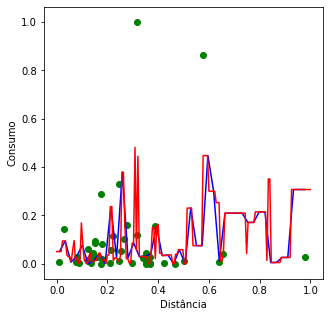

In [534]:
#Arvore Decisao
tree = DecisionTreeRegressor(criterion="mae", splitter="random")  
tree.fit(X_train, y_train)

T = np.linspace(min(X_test),max(X_test), len(X_test) )[:, np.newaxis]
O = np.linspace(min(X_train),max(X_train), len(X_train) )[:, np.newaxis]

xtrain_Len = len(X_train)
xtest_Len = len(X_test)

plt.scatter(X_test, y_test,color='g')
plt.plot(T.reshape(xtest_Len,1), tree.predict(T.reshape(xtest_Len,1)),color='b')
plt.plot(O.reshape(xtrain_Len,1), tree.predict(O.reshape(xtrain_Len,1)),color='r')
plt.xlabel('Distância')
plt.ylabel('Consumo')

print("R2T: ", tree.score(X_test,y_test))
print("RSST: ", calc_rss(y_test, tree.score(X_test,y_test)))
print("----")
print("R2O: ", tree.score(X_train,y_train))
print("RSSO: ", calc_rss(y_train, tree.score(X_train,y_train)))

In [535]:
X = dfQP.loc[:,["ChannelLength"]]
y = dfQP.loc[:,["nQuebras"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2T:  0.10819359364615011
RSST:  301225.0851954868
----
R2O:  0.48171459232540315
RSSO:  1775587.8753994738


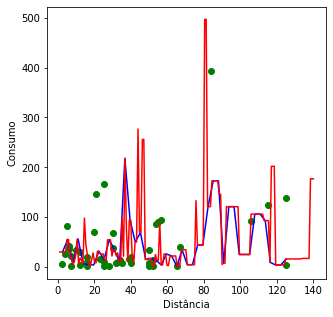

In [536]:
#KNRegressor  - UNIFORM
tree = DecisionTreeRegressor(criterion="mae", splitter="random")  
tree.fit(X_train, y_train)

T = np.linspace(min(X_test.values.ravel()),max(X_test.values.ravel()), len(X_test) )[:, np.newaxis]
O = np.linspace(min(X_train.values.ravel()),max(X_train.values.ravel()), len(X_train) )[:, np.newaxis]

plt.scatter(X_test, y_test,color='g')
plt.plot(T, tree.predict(T),color='b')
plt.plot(O, tree.predict(O),color='r')
plt.xlabel('Distância')
plt.ylabel('Consumo')

print("R2T: ", tree.score(X_test,y_test))
print("RSST: ", calc_rss(y_test, tree.score(X_test,y_test)))
print("----")
print("R2O: ", tree.score(X_train,y_train))
print("RSSO: ", calc_rss(y_train, tree.score(X_train,y_train)))

## Linear Regression Algoritmo

In [537]:
X = scaler.fit_transform(dfQP.loc[:,["ChannelLength"]])
y = scaler.fit_transform(dfQP.loc[:,["nQuebras"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2T:  -0.038988424558605406
RSST:  0.8908352746470561
----
R2O:  0.05792900644733423
RSSO:  4.504198852375054


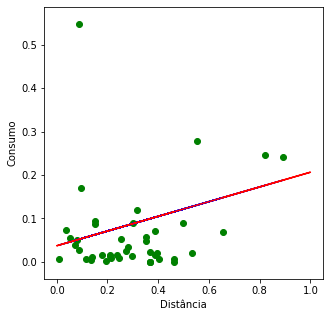

In [538]:
modelLinear = LinearRegression().fit(X_train,y_train)

plt.scatter(X_test,y_test,color='g')
plt.plot(X_test, modelLinear.predict(X_test),color="b")
plt.plot(X_train, modelLinear.predict(X_train),color="r")
plt.xlabel('Distância')
plt.ylabel('Consumo')

print("R2T: ", modelLinear.score(X_test,y_test))
print("RSST: ", calc_rss(y_test, modelLinear.score(X_test,y_test)))
print("----")
print("R2O: ", modelLinear.score(X_train,y_train))
print("RSSO: ", calc_rss(y_train, modelLinear.score(X_train,y_train)))

In [539]:
X = dfQP.loc[:,["ChannelLength"]]
y = dfQP.loc[:,["nQuebras"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

R2T:  0.038456883170236766
RSST:  752691.7818675266
----
R2O:  0.05257473012063418
RSSO:  1331681.228504186


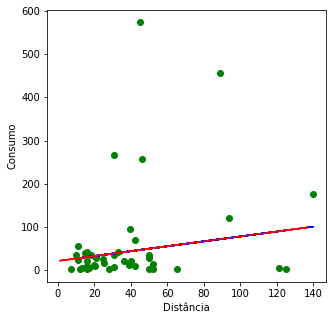

In [540]:
#Linear Regression
modelLinear = LinearRegression().fit(X_train,y_train)

plt.scatter(X_test,y_test,color='g')
plt.plot(X_test, modelLinear.predict(X_test),color="b")
plt.plot(X_train, modelLinear.predict(X_train),color="r")
plt.xlabel('Distância')
plt.ylabel('Consumo')

print("R2T: ", modelLinear.score(X_test,y_test))
print("RSST: ", calc_rss(y_test, modelLinear.score(X_test,y_test)))
print("----")
print("R2O: ", modelLinear.score(X_train,y_train))
print("RSSO: ", calc_rss(y_train, modelLinear.score(X_train,y_train)))